In [60]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


infile = open('../Data/rmsds','rb')
rmsds = pickle.load(infile)
infile.close()

infile = open('../Data/rmsds.pkl','rb')
rmsds_2 = pickle.load(infile)
infile.close()

rmsds.update(rmsd_2)

# rmsd is structured as such
# outter most dictionary: key = protein, val = dictionary2
# dictionary2: key = struc, val = dictionary3
# dictionary3: key = ligand, val = list of rmsds for the top 100 glide poses 

self_counter = 0
cross_counter = 0
error_counter = 0
self_docking_count = 0
cross_docking_count = 0
self_docking_sum = 0
cross_docking_sum = 0
cross_docking_min = sys.maxsize
cross_docking_max = -sys.maxsize
min_protein = ''
min_ligand = ''
min_struc = ''
max_protein = ''
max_ligand = ''
max_struc = ''

for protein in rmsds:
    for struc in rmsds[protein]:
        for ligand in rmsds[protein][struc]:
            if rmsds[protein][struc][ligand] == None:
                if ligand == struc:
                    self_counter += 1
                else:
                    cross_counter += 1
                continue
            if rmsds[protein][struc][ligand] == []:
                error_counter += 1
                continue
            rmsd = rmsds[protein][struc][ligand][0]
            if ligand == struc:
                self_counter += 1
                self_docking_sum += rmsd
                if rmsd < 2:
                    self_docking_count += 1
            else:
                cross_counter += 1
                cross_docking_sum += rmsd
                if rmsd < 2:
                    cross_docking_count += 1
                if rmsd < cross_docking_min:
                    cross_docking_min = rmsd
                    min_protein = protein
                    min_struc = struc
                    min_ligand = ligand
                if rmsd > cross_docking_max:
                    cross_docking_max = rmsd
                    max_protein = protein
                    max_struc = struc
                    max_ligand = ligand
                    
unnormalized_top_self_accuracy = self_docking_count * 100 / self_counter
unnormalized_top_cross_accuracy = cross_docking_count * 100 / cross_counter
             
print("Evaluating Top Glide Pose: ")
print(error_counter, "/",  self_counter + cross_counter, "empty")
print("Self Docking Accuracy: ", self_docking_count * 100 / self_counter)
print("Cross Docking Accuracy: ", cross_docking_count * 100 / cross_counter)      
print("Self Docking Average RMSD: ", self_docking_sum / self_counter)
print("Cross Docking Average RMSD: ", cross_docking_sum / cross_counter)
print("Cross Docking Min RMSD:", cross_docking_min, "protein:", min_protein, "struc:", min_struc, "ligand:", min_ligand)
print("Cross Docking Max RMSD:", cross_docking_max, "protein:", max_protein, "struc:", max_struc, "ligand:", max_ligand)

Evaluating Top Glide Pose: 
13 / 14205 empty
Self Docking Accuracy:  77.1689497716895
Cross Docking Accuracy:  42.190729258931206
Self Docking Average RMSD:  1.5424557739794196
Cross Docking Average RMSD:  3.789877051134137
Cross Docking Min RMSD: 0.118082773239 protein: AR struc: 1T5Z ligand: 2AM9
Cross Docking Max RMSD: 66.5386270973 protein: PYGM struc: 3EBP ligand: 2G9Q


In [61]:
self_counter = 0
cross_counter = 0
error_counter = 0
self_docking_count = 0
cross_docking_count = 0
self_docking_sum = 0
cross_docking_sum = 0
cross_docking_min = sys.maxsize
cross_docking_max = -sys.maxsize
min_protein = ''
min_ligand = ''
min_struc = ''
max_protein = ''
max_ligand = ''
max_struc = ''

for protein in rmsds:
    for struc in rmsds[protein]:
        for ligand in rmsds[protein][struc]:
            if rmsds[protein][struc][ligand] == None:
                if ligand == struc:
                    self_counter += 1
                else:
                    cross_counter += 1
                continue
            if rmsds[protein][struc][ligand] == []:
                error_counter += 1
                continue
            rmsd = min(rmsds[protein][struc][ligand])
            if ligand == struc:
                self_counter += 1
                self_docking_sum += rmsd
                if rmsd < 2:
                    self_docking_count += 1
            else:
                cross_counter += 1
                cross_docking_sum += rmsd
                if rmsd < 2:
                    cross_docking_count += 1
                if rmsd < cross_docking_min:
                    cross_docking_min = rmsd
                    min_protein = protein
                    min_struc = struc
                    min_ligand = ligand
                if rmsd > cross_docking_max:
                    cross_docking_max = rmsd
                    max_protein = protein
                    max_struc = struc
                    max_ligand = ligand
             
unnormalized_any_self_accuracy = self_docking_count * 100 / self_counter
unnormalized_any_cross_accuracy = cross_docking_count * 100 / cross_counter            

print("Evaluating All Glide Poses: ")
print(error_counter, "/",  self_counter + cross_counter, "empty")
print("Self Docking Accuracy: ", self_docking_count * 100 / self_counter)
print("Cross Docking Accuracy: ", cross_docking_count * 100 / cross_counter)      
print("Self Docking Average RMSD: ", self_docking_sum / self_counter)
print("Cross Docking Average RMSD: ", cross_docking_sum / cross_counter)
print("Cross Docking Min RMSD:", cross_docking_min, "protein:", min_protein, "struc:", min_struc, "ligand:", min_ligand)
print("Cross Docking Max RMSD:", cross_docking_max, "protein:", max_protein, "struc:", max_struc, "ligand:", max_ligand)

Evaluating All Glide Poses: 
13 / 14205 empty
Self Docking Accuracy:  91.47640791476408
Cross Docking Accuracy:  67.10953646294656
Self Docking Average RMSD:  0.6776090316390664
Cross Docking Average RMSD:  2.119328448322451
Cross Docking Min RMSD: 0.102874353364 protein: PYGM struc: 2QRH ligand: 2QRP
Cross Docking Max RMSD: 65.0368485577 protein: PYGM struc: 3EBP ligand: 2G9Q


In [32]:
import statistics
def stat_finder(protein):
    self_counter = 0
    cross_counter = 0
    error_counter = 0
    self_docking_count = 0
    cross_docking_count = 0
    self_docking_sum = 0
    cross_docking_sum = 0

    for struc in rmsds[protein]:
        for ligand in rmsds[protein][struc]:
            if rmsds[protein][struc][ligand] == None:
                if ligand == struc:
                    self_counter += 1
                else:
                    cross_counter += 1
                continue
            if rmsds[protein][struc][ligand] == []:
                error_counter += 1
                continue
            rmsd = rmsds[protein][struc][ligand][0]
            if ligand == struc:
                self_counter += 1
                self_docking_sum += rmsd
                if rmsd < 2:
                    self_docking_count += 1
            else:
                cross_counter += 1
                cross_docking_sum += rmsd
                if rmsd < 2:
                    cross_docking_count += 1
    if cross_counter == 0:
        return {'self_accuracy' : self_docking_count * 100 / self_counter,
            'cross_accuracy' : None,
            'self_avg' : self_docking_sum / self_counter,
            'cross_avg' : None}
    return {'self_accuracy' : self_docking_count * 100 / self_counter,
            'cross_accuracy' : cross_docking_count * 100 / cross_counter,
            'self_avg' : self_docking_sum / self_counter,
            'cross_avg' : cross_docking_sum / cross_counter}

print("Evaluating Stats for each protein: ")
top_stats = {}
for protein in rmsds:
    top_stats[protein] = stat_finder(protein)
    
print("Evaluating equally weighted stats for each protein")
top_self_accuracy = []
top_cross_accuracy = []
top_self_avg = []
top_cross_avg = []

for protein in top_stats:
    top_self_accuracy.append(top_stats[protein]['self_accuracy'])
    top_self_avg.append(top_stats[protein]['self_avg'])
    if not top_stats[protein]['cross_accuracy'] == None:
        top_cross_accuracy.append(top_stats[protein]['cross_accuracy'])
        top_cross_avg.append(top_stats[protein]['cross_avg'])
        
print("Self Docking Accuracy: ", statistics.mean(top_self_accuracy))
print("Cross Docking Accuracy: ", statistics.mean(top_cross_accuracy))      
print("Self Docking Average RMSD: ", statistics.mean(top_self_avg))
print("Cross Docking Average RMSD: ", statistics.mean(top_cross_avg))

Evaluating Stats for each protein: 
Evaluating equally weighted stats for each protein
Self Docking Accuracy:  76.18839377856406
Cross Docking Accuracy:  41.00192537022493
Self Docking Average RMSD:  1.623222764073952
Cross Docking Average RMSD:  3.6799292672367265


In [96]:
import statistics
def stat_finder(protein):
    self_counter = 0
    cross_counter = 0
    error_counter = 0
    self_docking_count = 0
    cross_docking_count = 0
    self_docking_sum = 0
    cross_docking_sum = 0

    for struc in rmsds[protein]:
        for ligand in rmsds[protein][struc]:
            if rmsds[protein][struc][ligand] == None:
                if ligand == struc:
                    self_counter += 1
                else:
                    cross_counter += 1
                continue
            if rmsds[protein][struc][ligand] == []:
                error_counter += 1
                continue
            rmsd = min(rmsds[protein][struc][ligand])
            if ligand == struc:
                self_counter += 1
                self_docking_sum += rmsd
                if rmsd < 2:
                    self_docking_count += 1
            else:
                cross_counter += 1
                cross_docking_sum += rmsd
                if rmsd < 2:
                    cross_docking_count += 1
    if cross_counter == 0:
        return {'self_accuracy' : self_docking_count * 100 / self_counter,
            'cross_accuracy' : None,
            'self_avg' : self_docking_sum / self_counter,
            'cross_avg' : None}
    return {'self_accuracy' : self_docking_count * 100 / self_counter,
            'cross_accuracy' : cross_docking_count * 100 / cross_counter,
            'self_avg' : self_docking_sum / self_counter,
            'cross_avg' : cross_docking_sum / cross_counter}

print("Evaluating Stats for each protein: ")
any_stats = {}
for protein in rmsds:
    any_stats[protein] = stat_finder(protein)
    
print("Evaluating normalized stats")
any_self_accuracy = []
any_cross_accuracy = []
any_self_avg = []
any_cross_avg = []

for protein in all_stats:
    any_self_accuracy.append(any_stats[protein]['self_accuracy'])
    any_self_avg.append(any_stats[protein]['self_avg'])
    if not all_stats[protein]['cross_accuracy'] == None:
        any_cross_accuracy.append(any_stats[protein]['cross_accuracy'])
        any_cross_avg.append(any_stats[protein]['cross_avg'])
        
print("Self Docking Accuracy: ", statistics.mean(any_self_accuracy))
print("Cross Docking Accuracy: ", statistics.mean(any_cross_accuracy))      
print("Self Docking Average RMSD: ", statistics.mean(any_self_avg))
print("Cross Docking Average RMSD: ", statistics.mean(any_cross_avg))

Evaluating Stats for each protein: 
Evaluating normalized stats
Self Docking Accuracy:  90.50890707160058
Cross Docking Accuracy:  69.3059686400043
Self Docking Average RMSD:  0.6750286062934958
Cross Docking Average RMSD:  1.9208163627863013


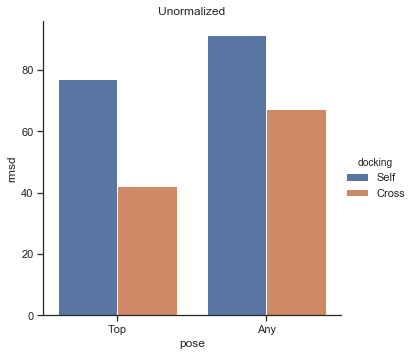

In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

unnormalized_all_graph_rmsds = []
unnormalized_all_graph_rmsds.append(['Top', unnormalized_top_self_accuracy, 'Self'])
unnormalized_all_graph_rmsds.append(['Any', unnormalized_any_self_accuracy, 'Self'])
unnormalized_all_graph_rmsds.append(['Top', unnormalized_top_cross_accuracy, 'Cross'])
unnormalized_all_graph_rmsds.append(['Any', unnormalized_any_cross_accuracy, 'Cross'])
df = pd.DataFrame(unnormalized_all_graph_rmsds)
df.columns= ['pose', 'rmsd', 'docking']
g = sns.catplot(x='pose', y='rmsd', hue='docking', data=df, kind="bar")
plt.title('Unormalized')
plt.show()

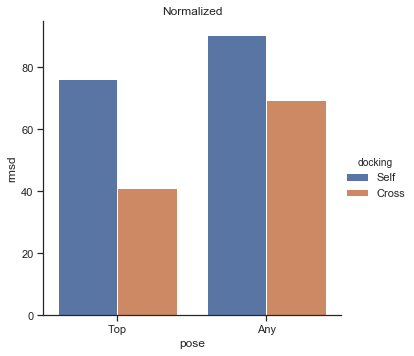

In [67]:
normalized_all_graph_rmsds = []
normalized_all_graph_rmsds.append(['Top', statistics.mean(top_self_accuracy), 'Self'])
normalized_all_graph_rmsds.append(['Any', statistics.mean(any_self_accuracy), 'Self'])
normalized_all_graph_rmsds.append(['Top', statistics.mean(top_cross_accuracy)  , 'Cross'])
normalized_all_graph_rmsds.append(['Any', statistics.mean(any_cross_accuracy), 'Cross'])
df = pd.DataFrame(normalized_all_graph_rmsds)
df.columns= ['pose', 'rmsd', 'docking']
g = sns.catplot(x='pose', y='rmsd', hue='docking', data=df, kind="bar")
plt.title('Normalized')
plt.show()

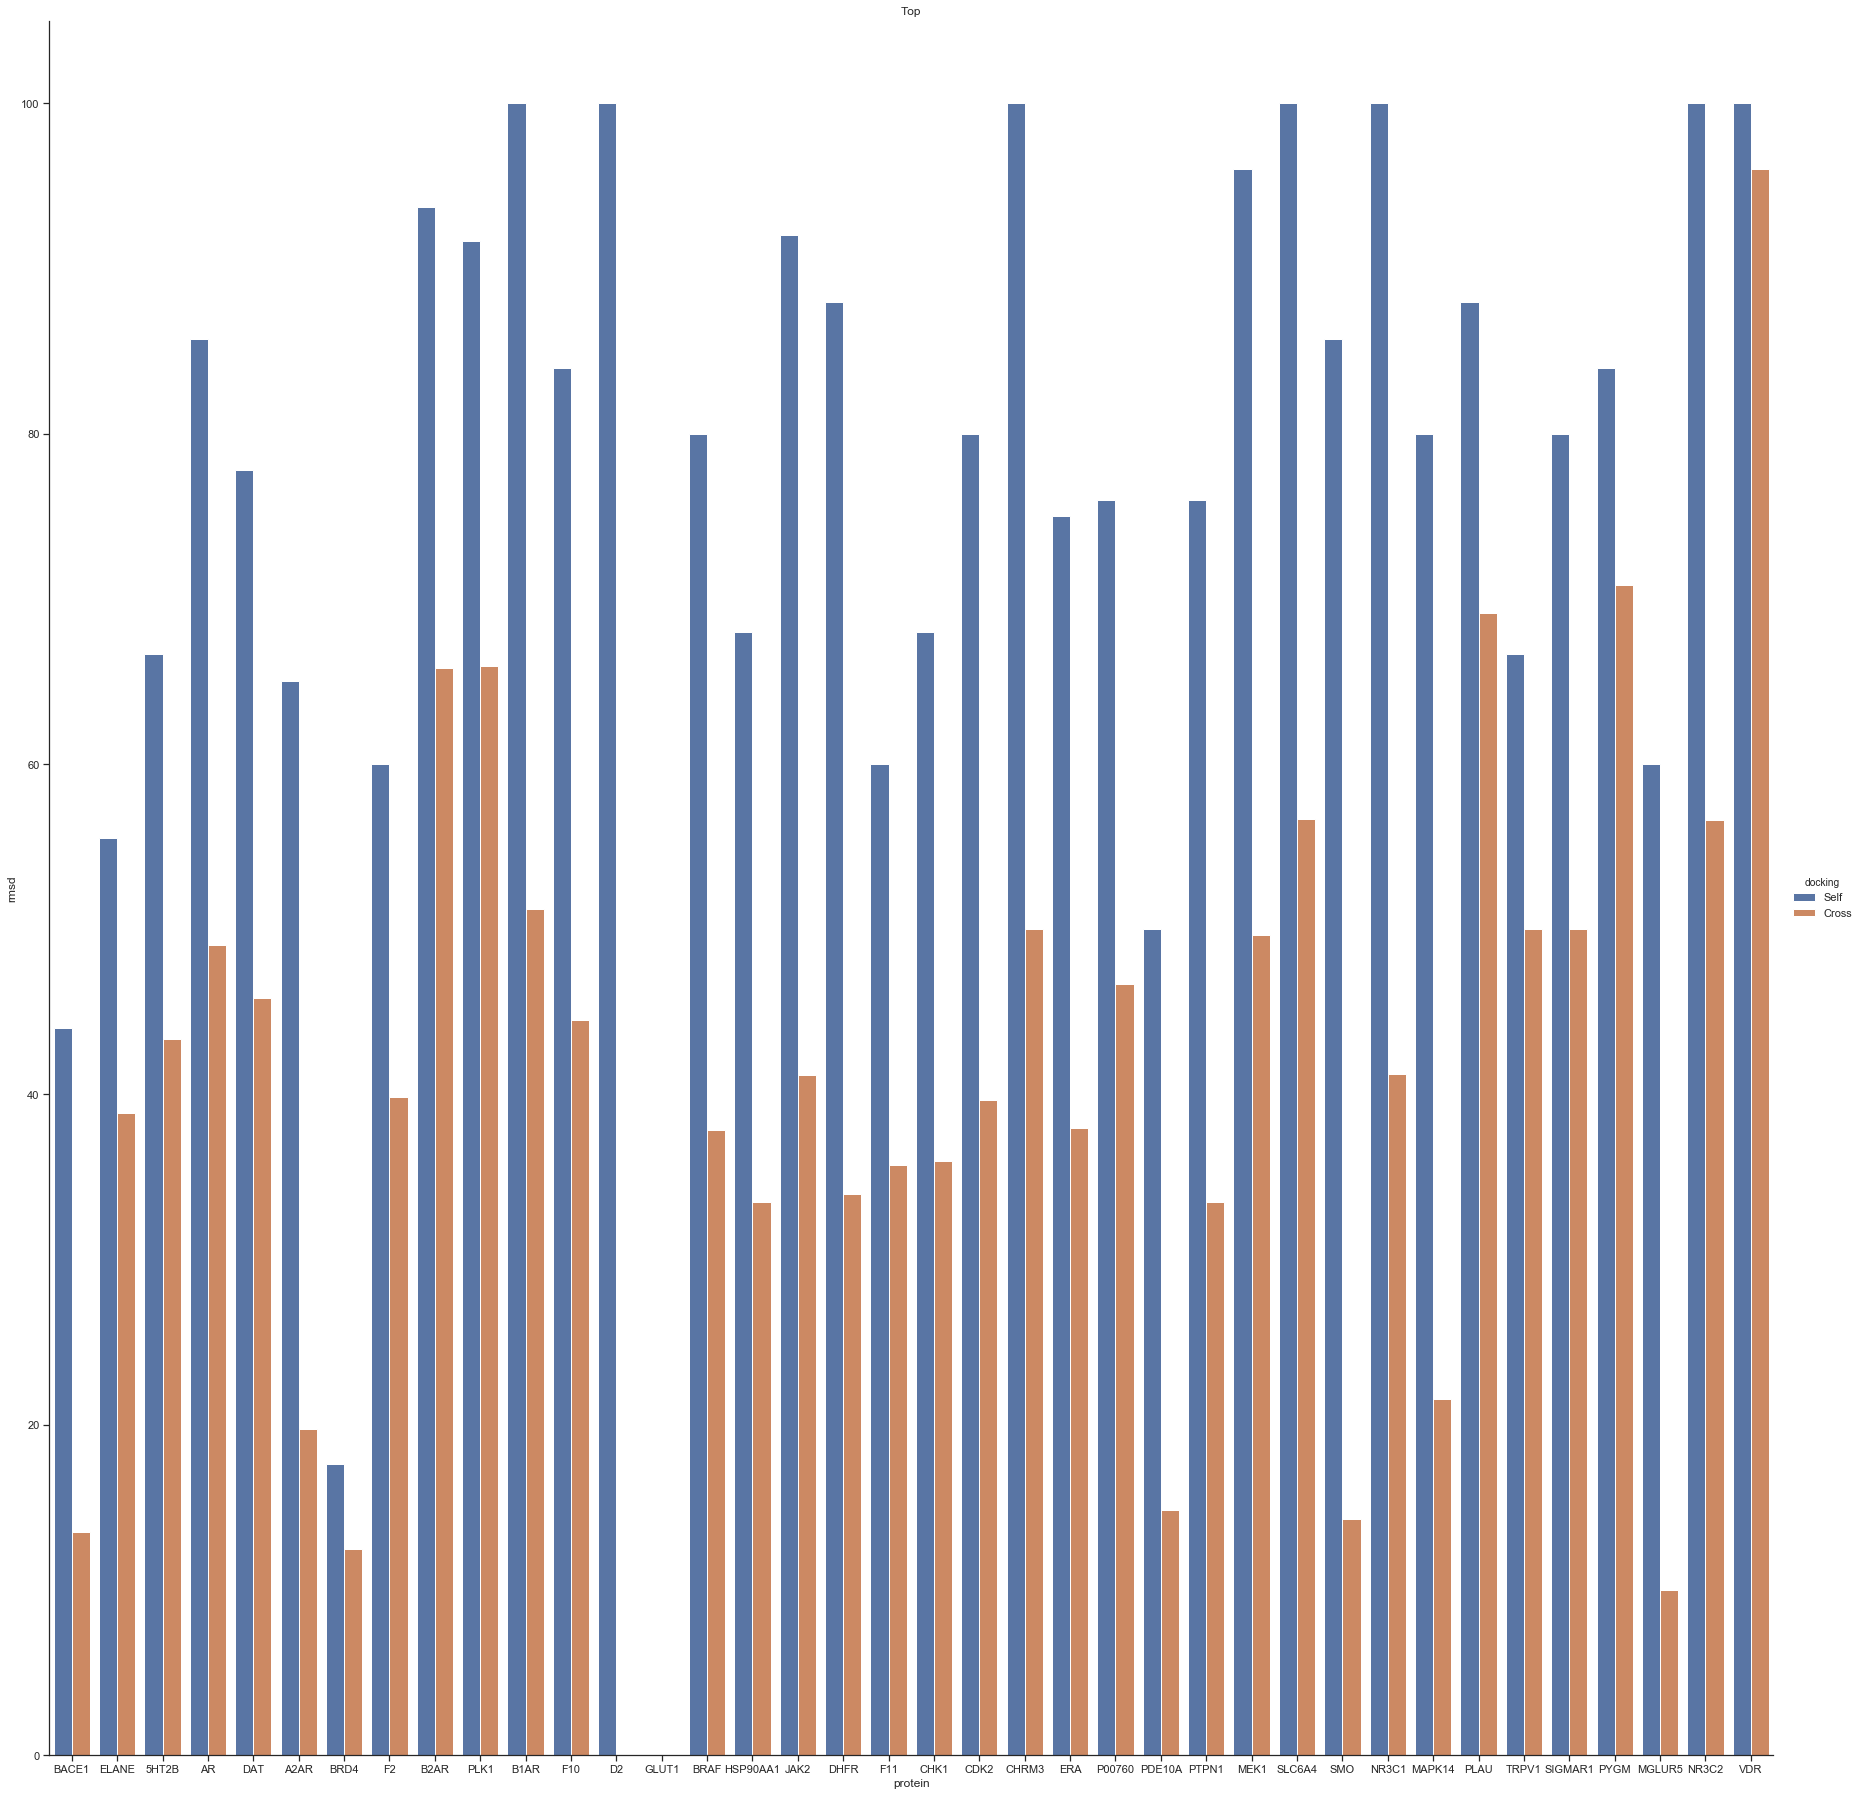

In [85]:
top_protein_graph_rmsds = []
for protein in top_stats:
    top_protein_graph_rmsds.append([protein, top_stats[protein]['self_accuracy'], 'Self'])
    top_protein_graph_rmsds.append([protein, top_stats[protein]['cross_accuracy'], 'Cross'])

df = pd.DataFrame(top_protein_graph_rmsds)
df.columns= ['protein', 'rmsd', 'docking']
g = sns.catplot(x='protein', y='rmsd', hue='docking', data=df, kind="bar", height=25)
plt.title('Top')
plt.show()

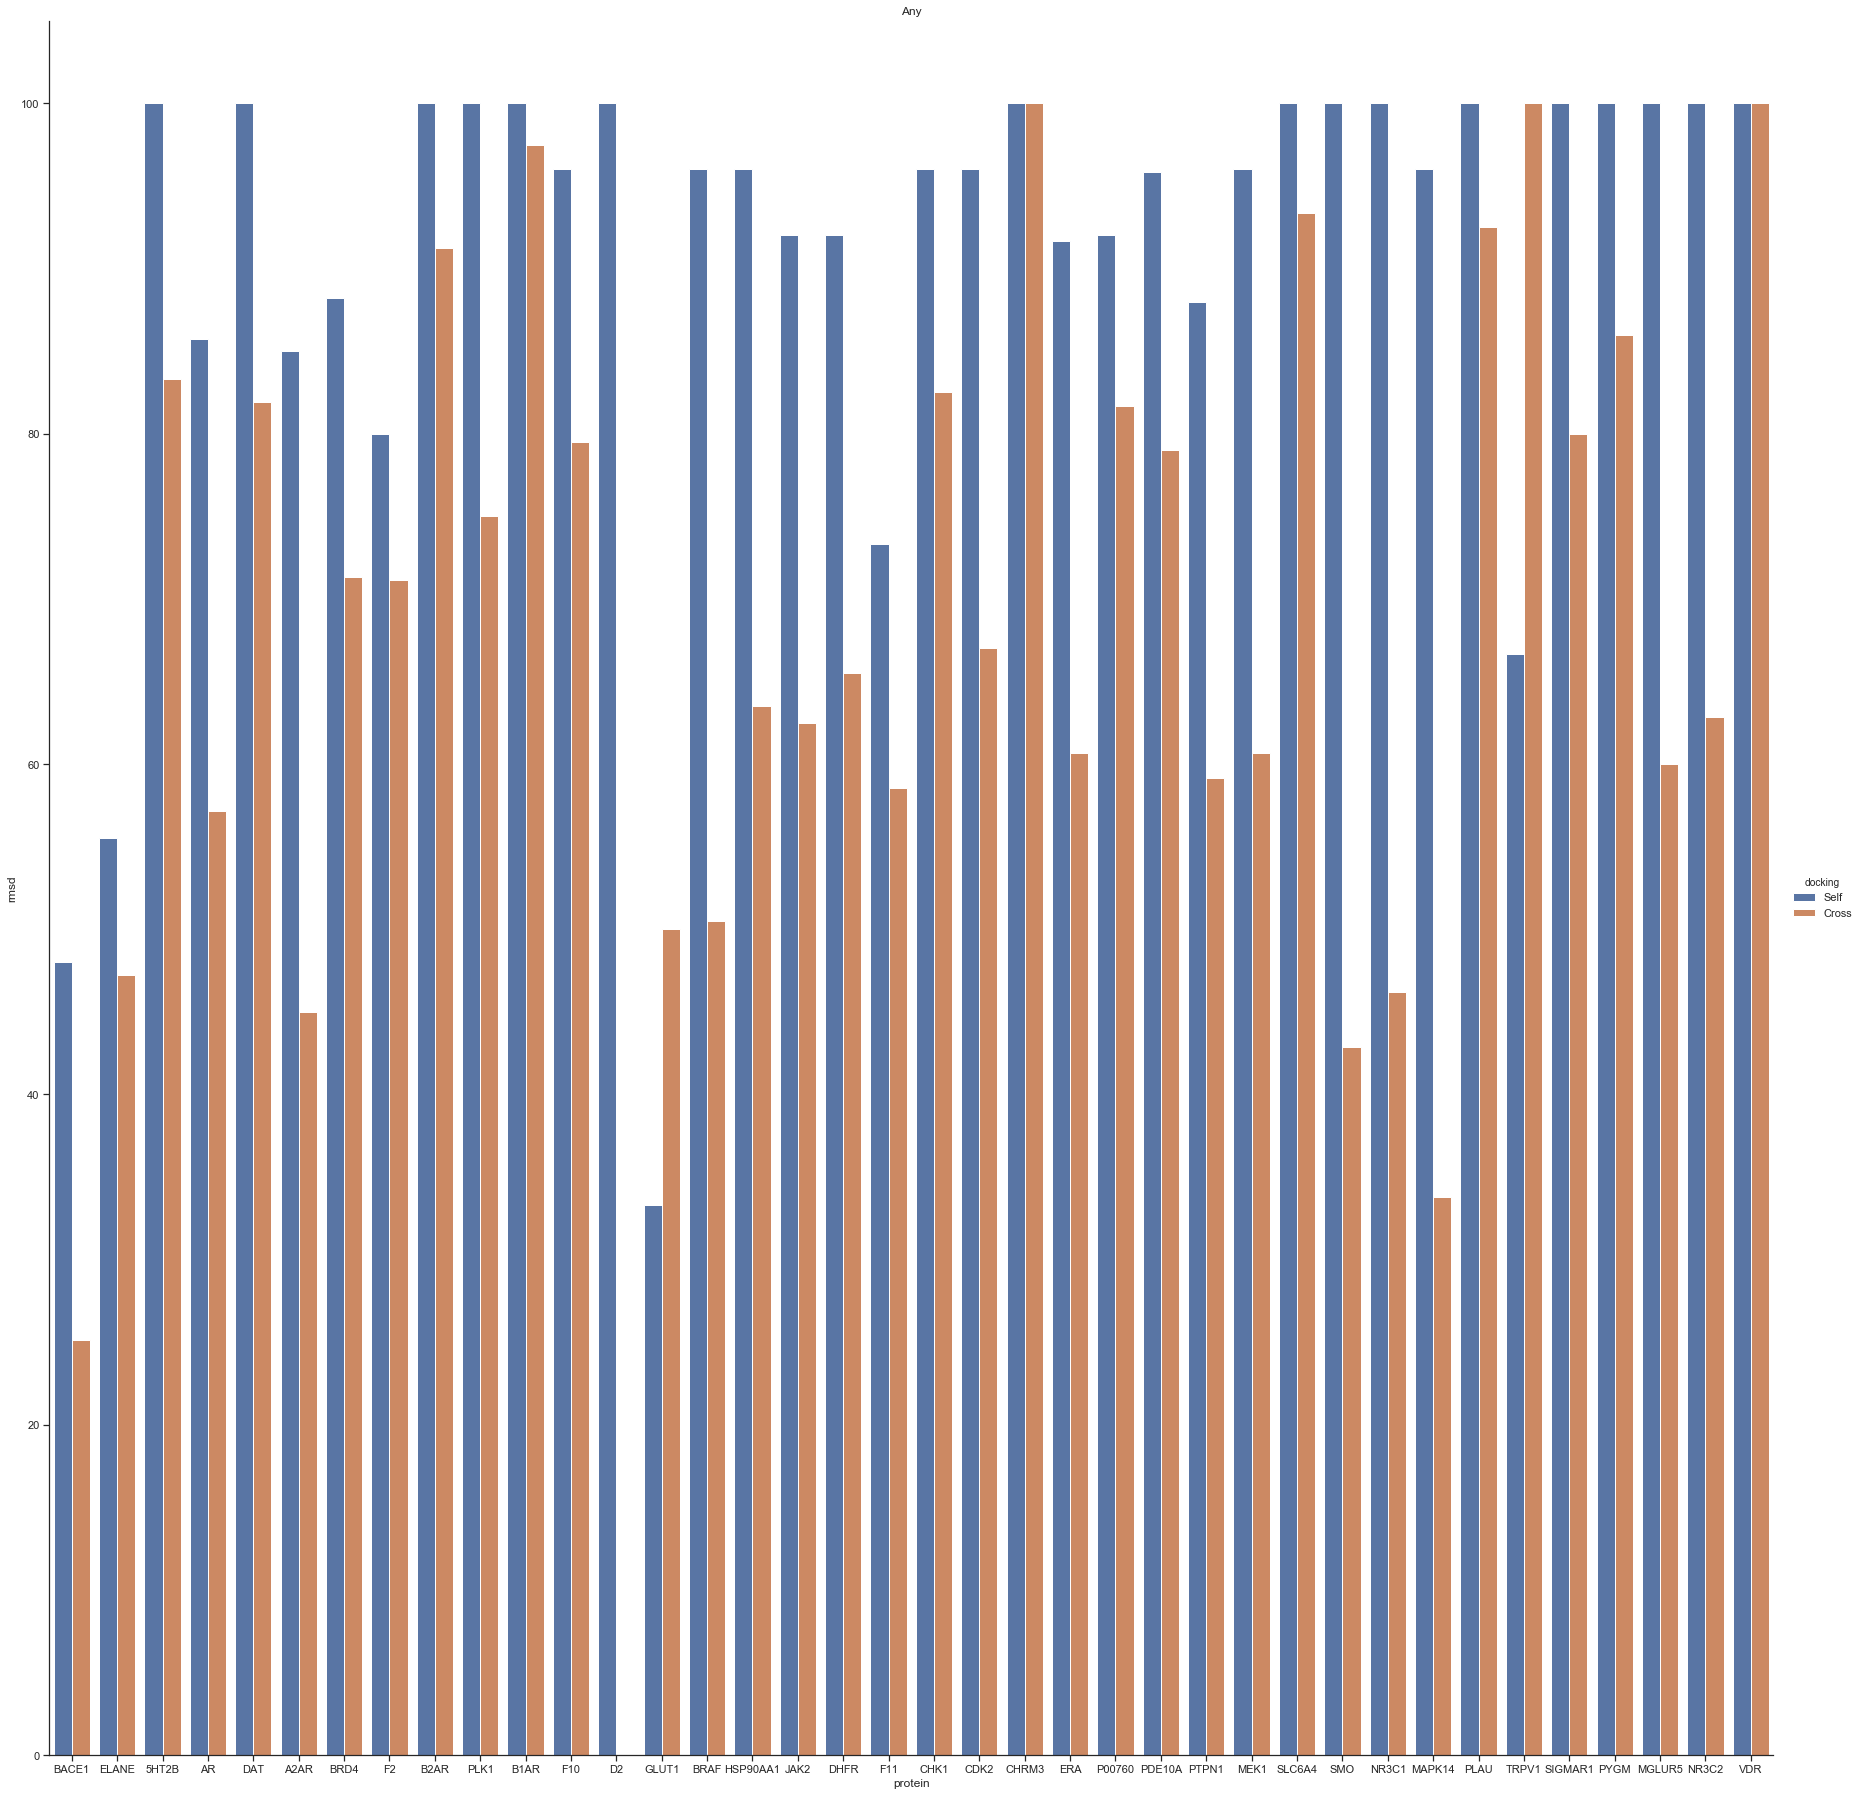

In [86]:
any_protein_graph_rmsds = []
for protein in top_stats:
    any_protein_graph_rmsds.append([protein, any_stats[protein]['self_accuracy'], 'Self'])
    any_protein_graph_rmsds.append([protein, any_stats[protein]['cross_accuracy'], 'Cross'])

df = pd.DataFrame(any_protein_graph_rmsds)
df.columns= ['protein', 'rmsd', 'docking']
g = sns.catplot(x='protein', y='rmsd', hue='docking', data=df, kind="bar", height=25)
plt.title('Any')
plt.show()

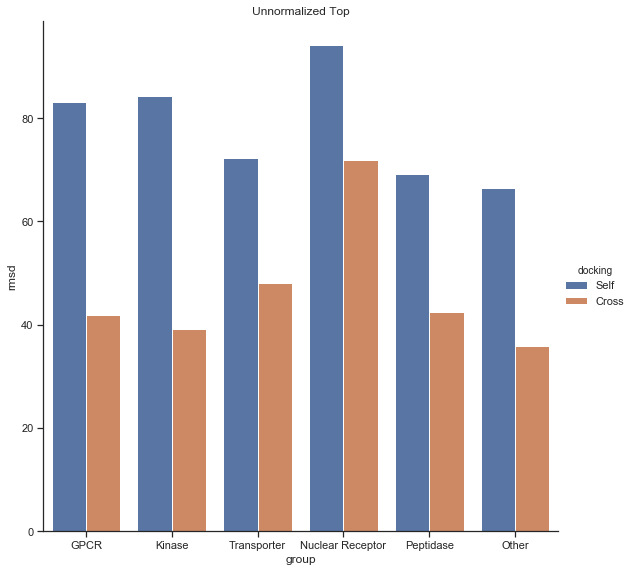

In [100]:
family = {
        'GPCR': ['5HT2B', 'A2AR', 'B1AR', 'B2AR', 'CHRM3','SMO', 'MGLUR5'],
        'Kinase': ['BRAF', 'CDK2', 'CHK1', 'JAK2', 'PLK1', 'MAPK14', 'MEK1'],
        'Transporter': ['SLC6A4', 'GLUT1', 'DAT'],
        'Nuclear Receptor': ['NR3C2', 'NR3C1', 'AR', 'VDR', 'ERA'],
        'Peptidase': ['F2', 'F10', 'F11', 'PLAU', 'P00760', 'BACE1'],
        'Other': ['PYGM', 'PTPN1', 'BRD4', 'HSP90AA1', 'PDE10A', 'SIGMAR1', 'ELANE', 'TRPV1', 'DHFR']
        }
unnormalized_top_group_graph_rmsds = []

for group in family:
    self_counter = 0
    cross_counter = 0
    self_docking_count = 0
    cross_docking_count = 0
    
    for protein in family[group]:
        for struc in rmsds[protein]:
            for ligand in rmsds[protein][struc]:
                if rmsds[protein][struc][ligand] == None or rmsds[protein][struc][ligand] == []:
                    continue
                rmsd = rmsds[protein][struc][ligand][0]
                if ligand == struc:
                    self_counter += 1
                    if rmsd < 2:
                        self_docking_count += 1
                else:
                    cross_counter += 1
                    if rmsd < 2:
                        cross_docking_count += 1
    unnormalized_top_group_graph_rmsds.append([group, self_docking_count * 100 / self_counter, 'Self'])
    unnormalized_top_group_graph_rmsds.append([group, cross_docking_count * 100 / cross_counter, 'Cross'])
        
df = pd.DataFrame(unnormalized_top_group_graph_rmsds)
df.columns= ['group', 'rmsd', 'docking']
g = sns.catplot(x='group', y='rmsd', hue='docking', data=df, kind="bar", height=8)
plt.title('Unnormalized Top')
plt.show()

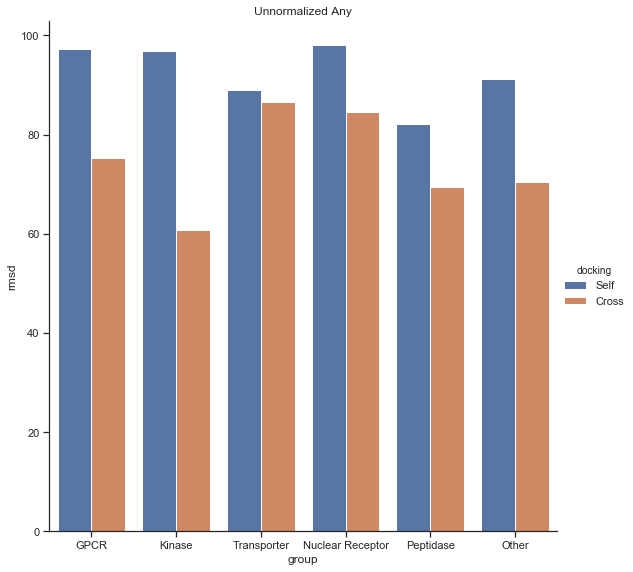

In [102]:
family = {
        'GPCR': ['5HT2B', 'A2AR', 'B1AR', 'B2AR', 'CHRM3','SMO', 'MGLUR5'],
        'Kinase': ['BRAF', 'CDK2', 'CHK1', 'JAK2', 'PLK1', 'MAPK14', 'MEK1'],
        'Transporter': ['SLC6A4', 'GLUT1', 'DAT'],
        'Nuclear Receptor': ['NR3C2', 'NR3C1', 'AR', 'VDR', 'ERA'],
        'Peptidase': ['F2', 'F10', 'F11', 'PLAU', 'P00760', 'BACE1'],
        'Other': ['PYGM', 'PTPN1', 'BRD4', 'HSP90AA1', 'PDE10A', 'SIGMAR1', 'ELANE', 'TRPV1', 'DHFR']
        }
unnormalized_any_group_graph_rmsds = []

for group in family:
    self_counter = 0
    cross_counter = 0
    self_docking_count = 0
    cross_docking_count = 0
    
    for protein in family[group]:
        for struc in rmsds[protein]:
            for ligand in rmsds[protein][struc]:
                if rmsds[protein][struc][ligand] == None or rmsds[protein][struc][ligand] == []:
                    continue
                rmsd = min(rmsds[protein][struc][ligand])
                if ligand == struc:
                    self_counter += 1
                    if rmsd < 2:
                        self_docking_count += 1
                else:
                    cross_counter += 1
                    if rmsd < 2:
                        cross_docking_count += 1
    unnormalized_any_group_graph_rmsds.append([group, self_docking_count * 100 / self_counter, 'Self'])
    unnormalized_any_group_graph_rmsds.append([group, cross_docking_count * 100 / cross_counter, 'Cross'])
        
df = pd.DataFrame(unnormalized_any_group_graph_rmsds)
df.columns= ['group', 'rmsd', 'docking']
g = sns.catplot(x='group', y='rmsd', hue='docking', data=df, kind="bar", height=8)
plt.title('Unnormalized Any')
plt.show()

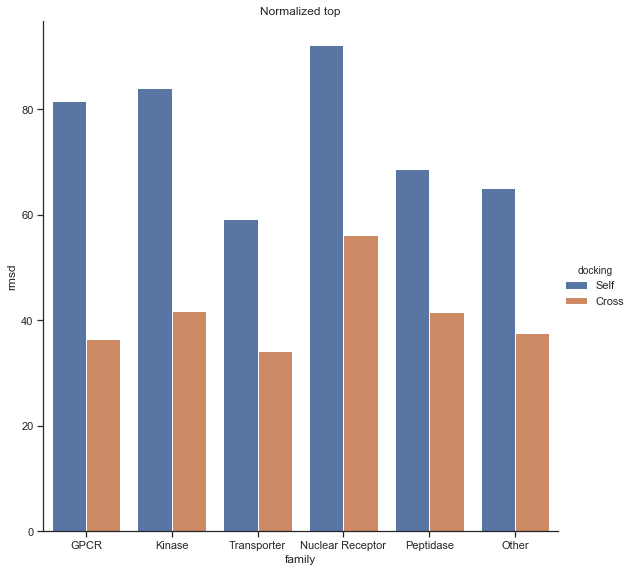

In [94]:
normalized_top_group_graph_rmsds = []
normalized_any_group_graph_rmsds = []

for group in family:
    top_self_accuracy = []
    top_cross_accuracy = []
    any_self_accuracy = []
    any_cross_accuracy = []
    for protein in family[group]:
        top_self_accuracy.append(top_stats[protein]['self_accuracy'])
        top_cross_accuracy.append(top_stats[protein]['cross_accuracy'])
        any_self_accuracy.append(any_stats[protein]['self_accuracy'])
        any_cross_accuracy.append(any_stats[protein]['cross_accuracy'])
    normalized_top_group_graph_rmsds.append([group, statistics.mean(top_self_accuracy), 'Self'])
    normalized_top_group_graph_rmsds.append([group, statistics.mean(top_cross_accuracy), 'Cross'])
    normalized_any_group_graph_rmsds.append([group, statistics.mean(any_self_accuracy), 'Self'])
    normalized_any_group_graph_rmsds.append([group, statistics.mean(any_cross_accuracy), 'Cross'])
    
df = pd.DataFrame(normalized_top_group_graph_rmsds)
df.columns= ['family', 'rmsd', 'docking']
g = sns.catplot(x='family', y='rmsd', hue='docking', data=df, kind="bar", height=8)
plt.title('Normalized top')
plt.show()

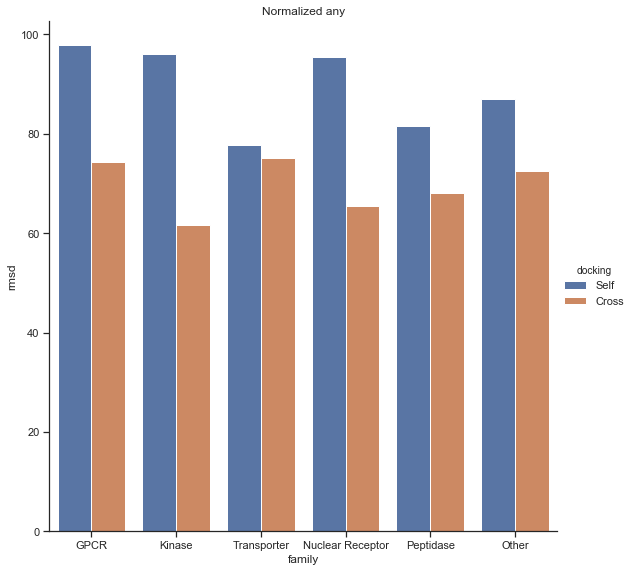

In [95]:
df = pd.DataFrame(normalized_any_group_graph_rmsds)
df.columns= ['family', 'rmsd', 'docking']
g = sns.catplot(x='family', y='rmsd', hue='docking', data=df, kind="bar", height=8)
plt.title('Normalized any')
plt.show()